In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import glob

In [139]:
all_files = glob.glob("*.csv")

df = pd.read_csv("fileID1_ProcessedTripData.csv", header=None, names=['Time (in seconds)',
                                                        'Vehicle’s speed (in m/s)',
                                                       'Passenger count (0 - 5)',
                                                        'Car’s load (0 - 10)',
                                                       'Air conditioning status (0 - 4)',
                                                       'Window opening (0 - 10)',
                                                       'Radio volume (0 - 10)',                                                               
                                                        'Rain intensity (0 - 10)',
                                                        'Visibility (0 - 10)',
                                                        'Driver’s wellbeing (0 - 10)',
                                                       'Driver’s rush (0 - 10)'])

converted = []
timeInterval = 1
addSpeeds = 0

def calculateQuartile():
    global converted
    global timeInterval
    global addSpeeds
    for index, row in df.iterrows():
        time = row['Time (in seconds)']
        speed = abs(row['Vehicle’s speed (in m/s)'])
        if timeInterval < time:
            timeInterval += 1
            newSpeed = int(addSpeeds * 0.01 * 3.6)
            if newSpeed >= 5:
                converted.append(newSpeed)
            addSpeeds = 0
        else:
            addSpeeds += speed
    newSpeed = int(addSpeeds * 0.01 * 3.6)
    if newSpeed >= 5:
        converted.append(newSpeed)
    converted.sort()
    firstq = np.percentile(converted, 25)
    thirdq = np.percentile(converted, 75)
    return firstq, thirdq

def inside_2(l1, l2, u1, u2, p25, p75):
    l = 0
    u = 0
    if l1 >= p25:
        if l2 <= p75:
            l = l2 - l1
        else:
            l = p75 - l1
    else:
        if l2 <= p75 and l2 >= p25:
            l = l2 - p25
    if u2 <= p75:
        if u1 >= p25:
            u = u2 - u1
        else:
            u = u2 - p25
    else:
        if u1 >= p25 and u1 <= p75:
            u = p75 - u1
    t = l + u
    return t

def inside_1(l, u, p25, p75):
    t = 0
    if l >= p25:
        if u <= p75:
            t = u - l
        else:
            t = p75 - l
    else:
        if u <= p75 and u >= p25:
            t = u - p25
    return t

def city(p25, p75):
    iqr = p75 - p25
    ng = inside_1(70, 200, p25, p75) / iqr
    s = inside_1(60, 70, p25, p75) / iqr
    g = inside_2(0, 20, 50, 60, p25, p75) / iqr
    e = inside_1(20, 50, p25, p75) / iqr
    stat = max(ng, s, g, e)
    if stat == ng:
        return -3
    elif stat == s:
        return 0
    elif stat == g:
        return 3
    else:
        return 5

mydf = pd.DataFrame({})


quartiles = calculateQuartile()
score = city(quartiles[0],quartiles[1])
print(score)

-3


In [133]:
df = mydf

In [ ]:
all_files = glob.glob("*.csv")

index = 0

df_from_each_file = (pd.read_csv(f, header=None, names=['Time (in seconds)',
                                                        'Vehicle’s speed (in m/s)',
                                                       'Shift number (0 = intermediate position)',
                                                       'Engine Load (% of max power)',
                                                       'Total Acceleration (m/s^2)',
                                                        'Engine RPM',
                                                       'Pitch',
                                                       'Lateral Acceleration (m/s^2)',
                                                       'Passenger count (0 - 5)',
                                                        'Car’s load (0 - 10)',
                                                       'Air conditioning status (0 - 4)',
                                                       'Window opening (0 - 10)',
                                                       'Radio volume (0 - 10)',                                                               
                                                        'Rain intensity (0 - 10)',
                                                        'Visibility (0 - 10)',
                                                        'Driver’s wellbeing (0 - 10)',
                                                       'Driver’s rush (0 - 10)']) for f in all_files)

In [55]:
all_files = glob.glob("*.csv")

filenames = glob.glob('*.{}'.format('csv'))

index = 0

df_from_each_file = (pd.read_csv(f, header=None, names=['Time (in seconds)',
                                                        'Vehicle’s speed (in m/s)',
                                                       'Shift number (0 = intermediate position)',
                                                       'Engine Load (% of max power)',
                                                       'Total Acceleration (m/s^2)',
                                                        'Engine RPM',
                                                       'Pitch',
                                                       'Lateral Acceleration (m/s^2)',
                                                       'Passenger count (0 - 5)',
                                                        'Car’s load (0 - 10)',
                                                       'Air conditioning status (0 - 4)',
                                                       'Window opening (0 - 10)',
                                                       'Radio volume (0 - 10)',                                                               
                                                        'Rain intensity (0 - 10)',
                                                        'Visibility (0 - 10)',
                                                        'Driver’s wellbeing (0 - 10)',
                                                       'Driver’s rush (0 - 10)']) for f in all_files)
df3 = None

def compress(df):
    df1 = pd.DataFrame({})
    timeInterval = 1
    speed = []
    shift = []
    engineLoad = []
    totalAcc = []
    engineRPM = []
    pitch = []
    lateralAcc = []
    passenger = []
    load = []
    aircond = []
    window = []
    radio = []
    rain = []
    visibility = []
    wellbeing = []
    rush = []
    
    for index, row in df.iterrows():
        time = row['Time (in seconds)']
        if timeInterval < time:
            df2 = pd.DataFrame({'Time (in seconds)': [timeInterval], 
                                'Vehicle’s speed (in m/s)': [np.mean(speed)],
                               'Shift number (0 = intermediate position)': [np.mean(shift)], 
                                'Engine Load (% of max power)' : [np.mean(engineLoad)],
                               'Total Acceleration (m/s^2)' : [np.mean(totalAcc)], 
                                'Engine RPM' : [np.mean(engineRPM)],
                               'Pitch' : [np.mean(pitch)], 
                                'Lateral Acceleration (m/s^2)' : [np.mean(lateralAcc)],
                               'Passenger count (0 - 5)' : [np.mean(passenger)], 
                                'Car’s load (0 - 10)' : [np.mean(load)],
                               'Air conditioning status (0 - 4)' : [np.mean(aircond)], 
                                'Window opening (0 - 10)' : [np.mean(window)],
                               'Radio volume (0 - 10)' : [np.mean(radio)], 
                                'Rain intensity (0 - 10)' : [np.mean(rain)],
                               'Visibility (0 - 10)' : [np.mean(visibility)], 
                                'Driver’s wellbeing (0 - 10)' : [np.mean(wellbeing)],
                               'Driver’s rush (0 - 10)' : [np.mean(rush)]})
            df1.append(df2)
            speed = []
            shift = []
            engineLoad = []
            totalAcc = []
            engineRPM = []
            pitch = []
            lateralAcc = []
            passenger = []
            load = []
            aircond = []
            window = []
            radio = []
            rain = []
            visibility = []
            wellbeing = []
            rush = []
            timeInterval += 1
            
        speed.append(row['Vehicle’s speed (in m/s)'])
        shift.append(row['Shift number (0 = intermediate position)']) 
        engineLoad.append(row['Engine Load (% of max power)'])
        totalAcc.append(row['Total Acceleration (m/s^2)'])
        engineRPM.append(row['Engine RPM'])
        pitch.append(row['Pitch'])
        lateralAcc.append(row['Lateral Acceleration (m/s^2)'])
        passenger.append(row['Passenger count (0 - 5)'])
        load.append(row['Car’s load (0 - 10)'])
        aircond.append(row['Air conditioning status (0 - 4)'])
        window.append(row['Window opening (0 - 10)'])
        radio.append(row['Radio volume (0 - 10)'])
        rain.append(row['Rain intensity (0 - 10)'])
        visibility.append(row['Visibility (0 - 10)'])
        wellbeing.append(row['Driver’s wellbeing (0 - 10)'])
        rush.append(row['Driver’s rush (0 - 10)'])
    
    df3 = df1
    

for df in df_from_each_file:
    compress(df)
    df3.to_csv(filenames[index], sep=',', header=False)
    index += 1
    #df.info()

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [20]:
df = pd.read_csv('fileID38_ProcessedTripData.csv', header=None, names=['Time (in seconds)',
                                                        'Vehicle’s speed (in m/s)',
                                                       'Shift number (0 = intermediate position)',
                                                       'Engine Load (% of max power)',
                                                       'Total Acceleration (m/s^2)',
                                                        'Engine RPM',
                                                       'Pitch',
                                                       'Lateral Acceleration (m/s^2)',
                                                       'Passenger count (0 - 5)',
                                                        'Car’s load (0 - 10)',
                                                       'Air conditioning status (0 - 4)',
                                                       'Window opening (0 - 10)',
                                                       'Radio volume (0 - 10)',                                                               
                                                        'Rain intensity (0 - 10)',
                                                        'Visibility (0 - 10)',
                                                        'Driver’s wellbeing (0 - 10)',
                                                       'Driver’s rush (0 - 10)'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850433 entries, 0 to 7850432
Data columns (total 16 columns):
Time (in seconds)Vehicle’s speed (in m/s)    float64
Shift number (0 = intermediate position)     float64
Engine Load (% of max power)                 float64
Total Acceleration (m/s^2)                   float64
Engine RPM                                   float64
Pitch                                        float64
Lateral Acceleration (m/s^2)                 float64
Passenger count (0 - 5)                      float64
Car’s load (0 - 10)                          float64
Air conditioning status (0 - 4)              float64
Window opening (0 - 10)                      float64
Radio volume (0 - 10)                        float64
Rain intensity (0 - 10)                      float64
Visibility (0 - 10)                          float64
Driver’s wellbeing (0 - 10)                  float64
Driver’s rush (0 - 10)                       float64
dtypes: float64(16)
memory usage: 958.3

In [22]:
df.isnull().sum()

Time (in seconds)Vehicle’s speed (in m/s)         0
Shift number (0 = intermediate position)          0
Engine Load (% of max power)                      0
Total Acceleration (m/s^2)                   101680
Engine RPM                                   101680
Pitch                                        101680
Lateral Acceleration (m/s^2)                 101680
Passenger count (0 - 5)                      101680
Car’s load (0 - 10)                          101680
Air conditioning status (0 - 4)              101680
Window opening (0 - 10)                      101680
Radio volume (0 - 10)                        101680
Rain intensity (0 - 10)                      101680
Visibility (0 - 10)                          101680
Driver’s wellbeing (0 - 10)                  101680
Driver’s rush (0 - 10)                       101680
dtype: int64

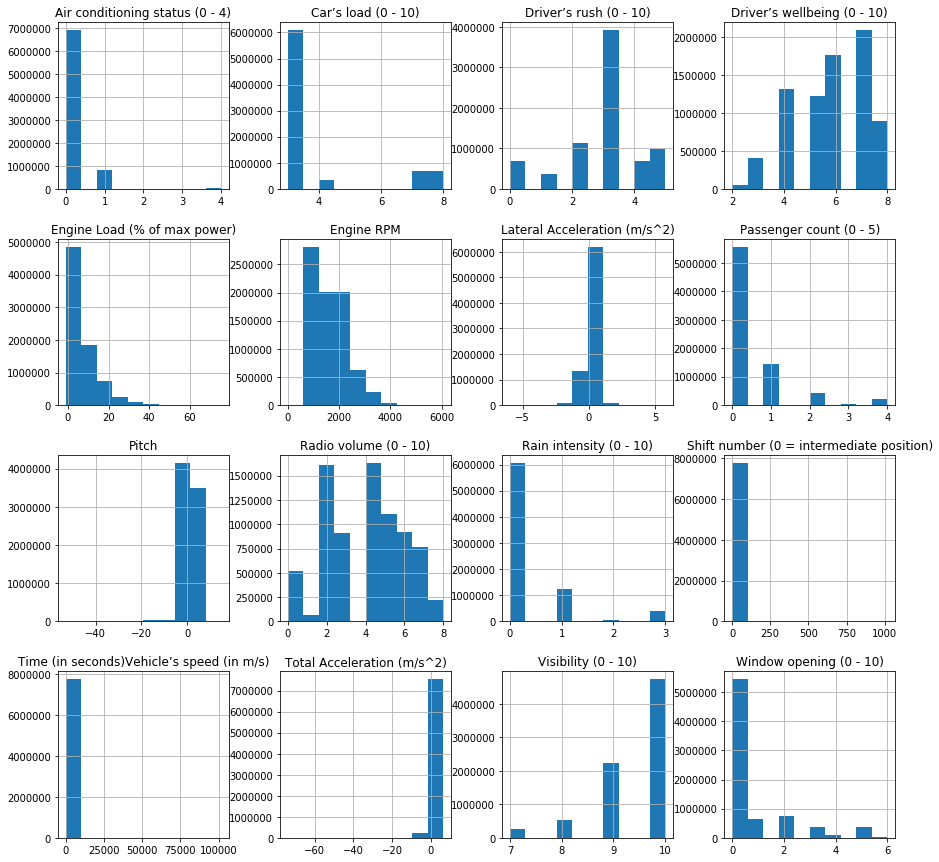

In [23]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [24]:
df.describe()

,Time (in seconds)Vehicle’s speed (in m/s),Shift number (0 = intermediate position),Engine Load (% of max power),Total Acceleration (m/s^2),Engine RPM,Pitch,Lateral Acceleration (m/s^2),Passenger count (0 - 5),Car’s load (0 - 10),Air conditioning status (0 - 4),Window opening (0 - 10),Radio volume (0 - 10),Rain intensity (0 - 10),Visibility (0 - 10),Driver’s wellbeing (0 - 10),Driver’s rush (0 - 10)
count,7.850433e+06,7.850433e+06,7.850433e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06
mean,6.662290e+02,8.323059e+00,7.846664e+00,1.598307e-01,1.594698e+03,9.360308e-01,-1.385369e-02,4.389443e-01,3.821738e+00,1.267436e-01,7.531711e-01,3.965360e+00,3.229290e-01,9.476609e+00,5.820096e+00,2.833010e+00
std,6.647726e+03,6.634475e+01,7.122455e+00,7.980135e-01,7.070260e+02,2.259470e+00,4.297008e-01,8.644514e-01,1.708074e+00,4.159354e-01,1.402824e+00,2.014243e+00,7.256086e-01,7.653467e-01,1.450747e+00,1.300116e+00
min,-5.030800e+01,0.000000e+00,-1.000000e+00,-7.377400e+01,-1.000000e+00,-5.302900e+01,-5.963300e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00
25%,6.917200e-01,0.000000e+00,3.100000e+00,-1.933200e-01,8.814200e+02,3.430900e-01,-4.617100e-02,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00
50%,6.851500e+00,2.000000e+00,4.700000e+00,1.550200e-01,1.579500e+03,1.144500e+00,-1.071600e-07,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+01,6.000000e+00,3.000000e+00
75%,1.247800e+01,3.000000e+00,1.025400e+01,4.934900e-01,2.080800e+03,1.809800e+00,3.239900e-02,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+01,7.000000e+00,3.000000e+00
max,1.016790e+05,1.016900e+03,7.535900e+01,6.485500e+00,6.060300e+03,1.481900e+01,5.776800e+00,4.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,3.000000e+00,1.000000e+01,8.000000e+00,5.000000e+00


In [25]:
from sklearn.preprocessing import Imputer
imput = Imputer(missing_values='NaN',strategy='mean')
df = list(imput.fit_transform(df))

for i in range(7850433):
    for j in range(16):
        df[i][j] = math.ceil(df[i][j])

/Users/clarice/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
df = pd.DataFrame(df)

In [57]:
df

,Time (in seconds),Vehicle’s speed (in m/s),Shift number (0 = intermediate position),Engine Load (% of max power),Total Acceleration (m/s^2),Engine RPM,Pitch,Lateral Acceleration (m/s^2),Passenger count (0 - 5),Car’s load (0 - 10),Air conditioning status (0 - 4),Window opening (0 - 10),Radio volume (0 - 10),Rain intensity (0 - 10),Visibility (0 - 10),Driver’s wellbeing (0 - 10),Driver’s rush (0 - 10)
0,0.021,0.000000,0,0.0000,0.000000,0.00,-0.40692,-0.000000,0,4,0,0,5,0,10,6,3
1,0.034,0.000000,0,0.0000,0.000000,0.00,-0.41543,-0.000000,0,4,0,0,5,0,10,6,3
2,0.036,0.000000,0,0.0000,0.000000,0.00,-0.42401,-0.000000,0,4,0,0,5,0,10,6,3
3,0.046,0.000000,0,0.0000,0.000000,0.00,-0.43263,-0.000000,0,4,0,0,5,0,10,6,3
4,0.056,0.000000,0,0.0000,0.000000,0.00,-0.44127,-0.000000,0,4,0,0,5,0,10,6,3
5,0.066,0.000000,0,0.0000,0.000000,0.00,-0.44992,-0.000000,0,4,0,0,5,0,10,6,3
6,0.078,0.000000,0,0.0000,0.000000,0.00,-0.45861,-0.000000,0,4,0,0,5,0,10,6,3
7,0.086,0.000000,0,0.0000,0.000000,0.00,-0.46725,-0.000000,0,4,0,0,5,0,10,6,3
8,0.096,0.000000,0,0.0000,0.000000,0.00,-0.47589,-0.000000,0,4,0,0,5,0,10,6,3
9,0.106,0.000000,0,0.0000,0.000000,0.00,-0.48465,-0.000000,0,4,0,0,5,0,10,6,3


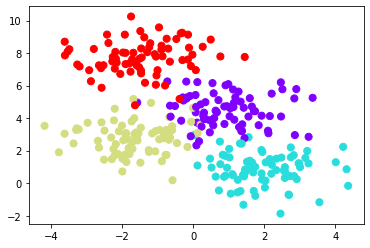

In [69]:
from sklearn.datasets import make_blobs

# Create our dataset
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

# Create scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import *
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df['Engine RPM']
y = df['Vehicle’s speed (in m/s)']

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)
model = RandomForestRegressor(n_estimators=20, max_depth=4, n_jobs=-1)
model.fit(train_x, train_y)
print('Train MAE: {}'.format(mean_absolute_error(train_y, model.predict(train_x))))
print('Test MAE: {}'.format(mean_absolute_error(test_y, model.predict(test_x))))

/Users/clarice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train MAE: 2.077759517082404
Test MAE: 2.0831121956826846


In [125]:
HEADERS = ['Score', 'Passenger count (0 - 5)',
                                                        'Car’s load (0 - 10)',
                                                       'Air conditioning status (0 - 4)',
                                                       'Window opening (0 - 10)',
                                                       'Radio volume (0 - 10)',                                                               
                                                        'Rain intensity (0 - 10)',
                                                        'Visibility (0 - 10)',
                                                        'Driver’s wellbeing (0 - 10)',
                                                       'Driver’s rush (0 - 10)']

def handle_missing_values(dataset, missing_values_header, missing_label):
    """
    Filter missing values from the dataset
    :param dataset:
    :param missing_values_header:
    :param missing_label:
    :return:
    """
 
    return dataset[dataset[missing_values_header] != missing_label]

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

def main():
    """
    Main function
    :return:
    """
    
    global df
 
    # Filter missing values
    #df = handle_missing_values(df, HEADERS[6], '?')
    train_x, test_x, train_y, test_y = split_dataset(df, 0.7, HEADERS[1:], HEADERS[0])
 
    # Train and Test dataset size details
    print("Train_x Shape :: ", train_x.shape)
    print("Train_y Shape :: ", train_y.shape)
    print("Test_x Shape :: ", test_x.shape)
    print("Test_y Shape :: ", test_y.shape)
 
    # Create random forest classifier instance
    trained_model = random_forest_classifier(train_x, train_y)
    print("Trained model :: ", trained_model)
    predictions = trained_model.predict(test_x)
 
    for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))
 
    print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
    print("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print(" Confusion matrix ", confusion_matrix(test_y, predictions))
    
main()

/Users/clarice/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/clarice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train_x Shape ::  (71176, 15)
Train_y Shape ::  (71176,)
Test_x Shape ::  (30504, 15)
Test_y Shape ::  (30504,)
Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Train Accuracy ::  1.0
Test Accuracy  ::  1.0
 Confusion matrix  [[30504]]


In [124]:
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, X, y, cv=10)

NameError: name 'cross_val_score' is not defined